In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Additional imports for recommendation system
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix

## Import Datasets

In [4]:
try:
    books = pd.read_csv(r"C:\Users\adity\Book_Recommendation_System\data\Books (1).csv")
    users = pd.read_csv(r"C:\Users\adity\Book_Recommendation_System\data\Users.csv", encoding="latin1")
    ratings=pd.read_csv(r"C:\Users\adity\Book_Recommendation_System\data\Ratings (1).csv", encoding="latin1")
    print("All datasets loaded successfully")

except FileNotFoundError as e:
    print("File Not Found", e)

except pd.errors.EmptyDataError:
    print("One of the data is empty")

except pd.errors.ParserError:
    print("Error while parsing CSV file")

except Exception as e:
    print("Unexpected Error Occured",e)

All datasets loaded successfully


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
print("Books Shape : ",books.shape)
print("Users Shape : ",users.shape)
print("Ratings Shape : ",ratings.shape)

Books Shape :  (271360, 8)
Users Shape :  (278858, 3)
Ratings Shape :  (1149780, 3)


## Checking for Missing Values

In [10]:
print("Books Missing Values:\n", books.isnull().sum(), "\n")
print("Users Missing Values:\n", users.isnull().sum(), "\n")
print("Ratings Missing Values:\n", ratings.isnull().sum())

Books Missing Values:
 ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64 

Users Missing Values:
 User-ID          0
Location         0
Age         110762
dtype: int64 

Ratings Missing Values:
 User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


## Handling the missing values

In [12]:
books[books['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...,http://images.amazon.com/images/P/0751352497.0...
187689,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...,http://images.amazon.com/images/P/9627982032.0...


In [13]:
books = books.dropna(subset=['Book-Author'])

In [14]:
books[books['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [15]:
books = books.dropna(subset=['Publisher'])

In [16]:
books = books.dropna(subset=['Image-URL-L'])

In [17]:
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
Image-URL-S            0
Image-URL-M            0
Image-URL-L            0
dtype: int64

In [18]:
users = users.dropna(subset=['Age'])             # Droped missings in Age column

In [19]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [20]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [21]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
Image-URL-S            object
Image-URL-M            object
Image-URL-L            object
dtype: object

## EDA on Books 

In [23]:
books["Year-Of-Publication"] = pd.to_numeric(
    books["Year-Of-Publication"], errors="coerce"
)

In [24]:
books["Year-Of-Publication"].min()

0

In [25]:
books["Year-Of-Publication"].max()

2050

In [26]:
books["Year-Of-Publication"].describe()

count    271353.000000
mean       1959.760235
std         257.996082
min           0.000000
25%        1989.000000
50%        1995.000000
75%        2000.000000
max        2050.000000
Name: Year-Of-Publication, dtype: float64

In [27]:
books[books["Year-Of-Publication"] == 0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


In [28]:
books = books[books["Year-Of-Publication"] != 0]           # Removed all rows with 0 publication year

In [29]:
books.describe()

,Year-Of-Publication
count,266735.000000
mean,1993.689688
std,8.325839
min,1376.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2050.000000


In [30]:
books[books["Year-Of-Publication"] == 2024]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
246842,0380000059,CLOUT,D. GIBBONS,2024,Avon,http://images.amazon.com/images/P/0380000059.0...,http://images.amazon.com/images/P/0380000059.0...,http://images.amazon.com/images/P/0380000059.0...


In [31]:
books = books[
    (books["Year-Of-Publication"] >= 1900) &
    (books["Year-Of-Publication"] <= 2025)
]

In [32]:
books.shape

(266719, 8)

In [33]:
books.describe()

,Year-Of-Publication
count,266719.000000
mean,1993.693554
std,8.138069
min,1900.000000
25%,1989.000000
50%,1996.000000
75%,2000.000000
max,2024.000000


In [34]:
books.nunique()

ISBN                   266719
Book-Title             238493
Book-Author            100662
Year-Of-Publication       106
Publisher               16391
Image-URL-S            266410
Image-URL-M            266410
Image-URL-L            266410
dtype: int64

In [35]:
authors_with_years=books.groupby("Book-Author")["Year-Of-Publication"].agg(["min", "max", "count"])

In [36]:
authors_with_years

,min,max,count
Book-Author,,,
D. Chiel,1995,1995,1
J. D. Landis,2003,2003,1
Mimma Balia,2000,2000,1
'N Sync,1998,1998,1
142 moms from all over the world,2002,2002,1
...,...,...,...
Â¢ystein LÂ²nn,1995,1995,1
Ã?dÃ¶n von HorvÃ¡th,1975,1988,3
Ã?Â?dÃ?Â¶n von Horvath,1999,1999,1


In [37]:
author_year_count_df = (
    books
    .groupby(["Book-Author", "Year-Of-Publication","Publisher"])
    .size()
    .reset_index(name="Book-Count")
)

author_year_count_df.head(20)

,Book-Author,Year-Of-Publication,Publisher,Book-Count
0,D. Chiel,1995,St Martins Pr,1
1,J. D. Landis,2003,Ballantine Books,1
2,Mimma Balia,2000,Artisan Publishers,1
3,'N Sync,1998,Delacorte Press,1
4,142 moms from all over the world,2002,"Sound Bite Press, Inc.",1
5,1977 Inaugural Committee (U.S.),1977,Bantam Books,1
6,1st Graders of Samuel s Nixon School Carnegie ...,1988,Pages Publishing Group,1
7,21st Century Publishing,1994,Twenty-First Century Publishing (FL),1
8,73 Magazine Editors,1982,McGraw-Hill,1
9,";Katie Stewart""",1971,Methuen,1


In [38]:
author_year_count_df.sort_values("Book-Count", ascending=False).head(20)

,Book-Author,Year-Of-Publication,Publisher,Book-Count
15733,Author Unknown,1984,Harlequin,94
10197,Ann M. Martin,1995,Scholastic,51
182174,R. L. Stine,1995,Scholastic,48
10201,Ann M. Martin,1996,Scholastic,47
126353,Kelli M. Gary,1983,Pocket,41
69917,Francine Pascal,1984,Bantam Books,36
76628,Georges Simenon,2002,Tusquets,36
10206,Ann M. Martin,1997,Scholastic,33
130499,Landoll,1999,Landoll,32
126352,Kelli M. Gary,1982,Pocket,32


In [39]:
publishers = books['Publisher'].value_counts()
publishers

Publisher
Harlequin                         7535
Silhouette                        4220
Pocket                            3870
Ballantine Books                  3764
Bantam Books                      3642
                                  ... 
Wigwam Publishing Co.                1
Oxbow Books Limited                  1
Hawaiian Service, Incorporated       1
Royal House Pub. Co.                 1
Connaught                            1
Name: count, Length: 16391, dtype: int64

In [40]:
top_50_publishers = publishers.sort_values(ascending=False)[:51]
top_50_publishers

Publisher
Harlequin                             7535
Silhouette                            4220
Pocket                                3870
Ballantine Books                      3764
Bantam Books                          3642
Scholastic                            3157
Simon &amp; Schuster                  2965
Penguin Books                         2843
Berkley Publishing Group              2767
Penguin USA                           2714
Warner Books                          2703
Harpercollins                         2518
Fawcett Books                         2257
Signet Book                           2067
Random House Inc                      2045
St Martins Pr                         1952
St. Martin's Press                    1782
Tor Books                             1703
Zebra Books                           1694
HarperCollins Publishers              1690
Bantam                                1658
Avon                                  1566
Jove Books                            1553
V

## Ratings Dataset

In [42]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [43]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [44]:
ratings.duplicated().sum()

0

In [45]:
ratings["Book-Rating"].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

In [46]:
rating_percentage = ratings["Book-Rating"].value_counts(normalize=True) * 100
rating_percentage

Book-Rating
0     62.282263
8      9.022248
10     6.836960
7      6.649707
9      5.874254
5      4.433370
6      3.211397
4      0.774409
3      0.521491
2      0.239959
1      0.153942
Name: proportion, dtype: float64

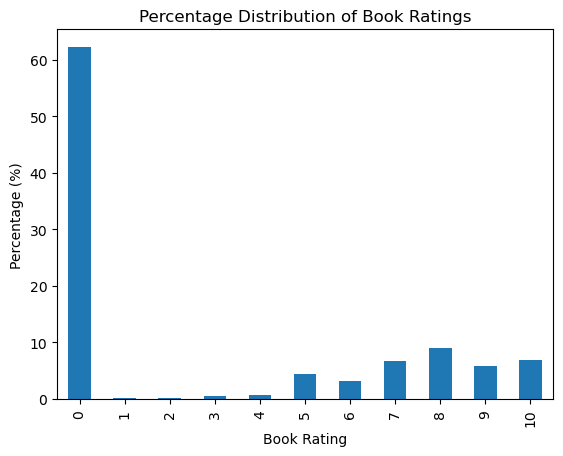

In [49]:
plt.figure()
rating_percentage.sort_index().plot(kind="bar")
plt.xlabel("Book Rating")
plt.ylabel("Percentage (%)")
plt.title("Percentage Distribution of Book Ratings")
plt.show()

In [53]:
print("Books Shape : ",books.shape)
print("ratings Shape : ",ratings.shape)

Books Shape :  (266719, 8)
ratings Shape :  (1149780, 3)


### Merging Books data and Ratings data

In [55]:
BookRating = pd.merge(ratings, books, on="ISBN")
BookRating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...


In [56]:
BookRating.shape

(1017062, 10)

In [57]:
BookRating.duplicated().sum()

0

In [58]:
averageRating = pd.DataFrame(BookRating.groupby('ISBN')['Book-Rating'].mean().round(1))
averageRating.reset_index(inplace=True)
averageRating.head()
averageRating.rename(columns={'Book-Rating':'Average-Rating'}, inplace=True)

### Merging BookRating and AverageRating 

In [60]:
averageRatingdf = pd.merge(BookRating, averageRating, on='ISBN')
averageRatingdf.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Average-Rating
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,2.9
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,2.5
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,4.1
3,276729,052165615X,3,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,3.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,http://images.amazon.com/images/P/0521795028.0...,6.0


In [61]:
averageRatingdf.shape

(1017062, 11)

In [62]:
averageRatingOnly = averageRatingdf[['ISBN','Average-Rating']]
averageRatingOnly.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [64]:
averageRatingUnique = averageRatingOnly[['ISBN','Average-Rating']].drop_duplicates(subset=['ISBN'])
averageRatingUnique.head()

,ISBN,Average-Rating
0,034545104X,2.9
1,0155061224,2.5
2,0446520802,4.1
3,052165615X,3.0
4,0521795028,6.0


In [65]:
ratingBooks = pd.merge(books, averageRatingUnique, on='ISBN', how='inner')

In [66]:
books_with_rating = pd.merge(books, averageRatingUnique, on='ISBN')
books_with_rating.shape

(265531, 9)

In [68]:
books_with_rating = books_with_rating[['ISBN','Book-Title','Book-Author','Average-Rating','Year-Of-Publication','Publisher','Image-URL-S','Image-URL-M','Image-URL-L']]
books_with_rating.head()

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,0.0,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,4.9,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,5.0,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,4.3,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,0.0,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [69]:
books_with_rating.sort_values(by=['Average-Rating'], ascending=False).head(30)

,ISBN,Book-Title,Book-Author,Average-Rating,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
127891,0740714481,Birthdays Rock And So Do You,Cate Holly,10.0,2001,Andrews McMeel Publishing,http://images.amazon.com/images/P/0740714481.0...,http://images.amazon.com/images/P/0740714481.0...,http://images.amazon.com/images/P/0740714481.0...
232822,3908247462,Dayanita Singh: Myself Mona Ahmed,Dayanita Singh,10.0,2001,Scalo Verlag Ac,http://images.amazon.com/images/P/3908247462.0...,http://images.amazon.com/images/P/3908247462.0...,http://images.amazon.com/images/P/3908247462.0...
200772,0879738502,The Teaching of Christ: A Catholic Catechism f...,Ronald Lawler,10.0,1991,Our Sunday Visitor,http://images.amazon.com/images/P/0879738502.0...,http://images.amazon.com/images/P/0879738502.0...,http://images.amazon.com/images/P/0879738502.0...
200771,038508045X,The Catholic Catechism,John A. Hardon,10.0,1975,Image,http://images.amazon.com/images/P/038508045X.0...,http://images.amazon.com/images/P/038508045X.0...,http://images.amazon.com/images/P/038508045X.0...
232818,9997410440,Nine Hours to Rama,Stanley Wolpert,10.0,1962,Random House (T),http://images.amazon.com/images/P/9997410440.0...,http://images.amazon.com/images/P/9997410440.0...,http://images.amazon.com/images/P/9997410440.0...
200768,0140440275,Imitation of Christ (Penguin Classics),Thomas A. Kempis,10.0,1952,Penguin Books,http://images.amazon.com/images/P/0140440275.0...,http://images.amazon.com/images/P/0140440275.0...,http://images.amazon.com/images/P/0140440275.0...
45031,0889994803,Illness &amp; Healing: Images of Cancer,Robert Pope,10.0,1996,Lancelot Press,http://images.amazon.com/images/P/0889994803.0...,http://images.amazon.com/images/P/0889994803.0...,http://images.amazon.com/images/P/0889994803.0...
200767,0671770802,GLOBAL WARNING: A POP-UP BOOK OF OUR ENDANGERE...,Harriet Jacobs,10.0,1992,Little Simon,http://images.amazon.com/images/P/0671770802.0...,http://images.amazon.com/images/P/0671770802.0...,http://images.amazon.com/images/P/0671770802.0...
200764,038501189X,The Jerusalem Bible,Alexander Jones,10.0,1971,Doubleday Books,http://images.amazon.com/images/P/038501189X.0...,http://images.amazon.com/images/P/038501189X.0...,http://images.amazon.com/images/P/038501189X.0...
215935,140104140X,Crooked Lines,Tom McGinley,10.0,2002,Xlibris Corporation,http://images.amazon.com/images/P/140104140X.0...,http://images.amazon.com/images/P/140104140X.0...,http://images.amazon.com/images/P/140104140X.0...


In [70]:
ratings_sorted = books_with_rating['Average-Rating'].value_counts().sort_index(ascending=False)
display(ratings_sorted)
books_with_rating['Average-Rating'].value_counts(normalize=True).round(4).sort_index(ascending=False)

Average-Rating
10.0     12902
9.8         12
9.7         47
9.6          2
9.5        475
         ...  
0.4        124
0.3        101
0.2         48
0.1         12
0.0     118432
Name: count, Length: 100, dtype: int64

Average-Rating
10.0    0.0486
9.8     0.0000
9.7     0.0002
9.6     0.0000
9.5     0.0018
         ...  
0.4     0.0005
0.3     0.0004
0.2     0.0002
0.1     0.0000
0.0     0.4460
Name: proportion, Length: 100, dtype: float64

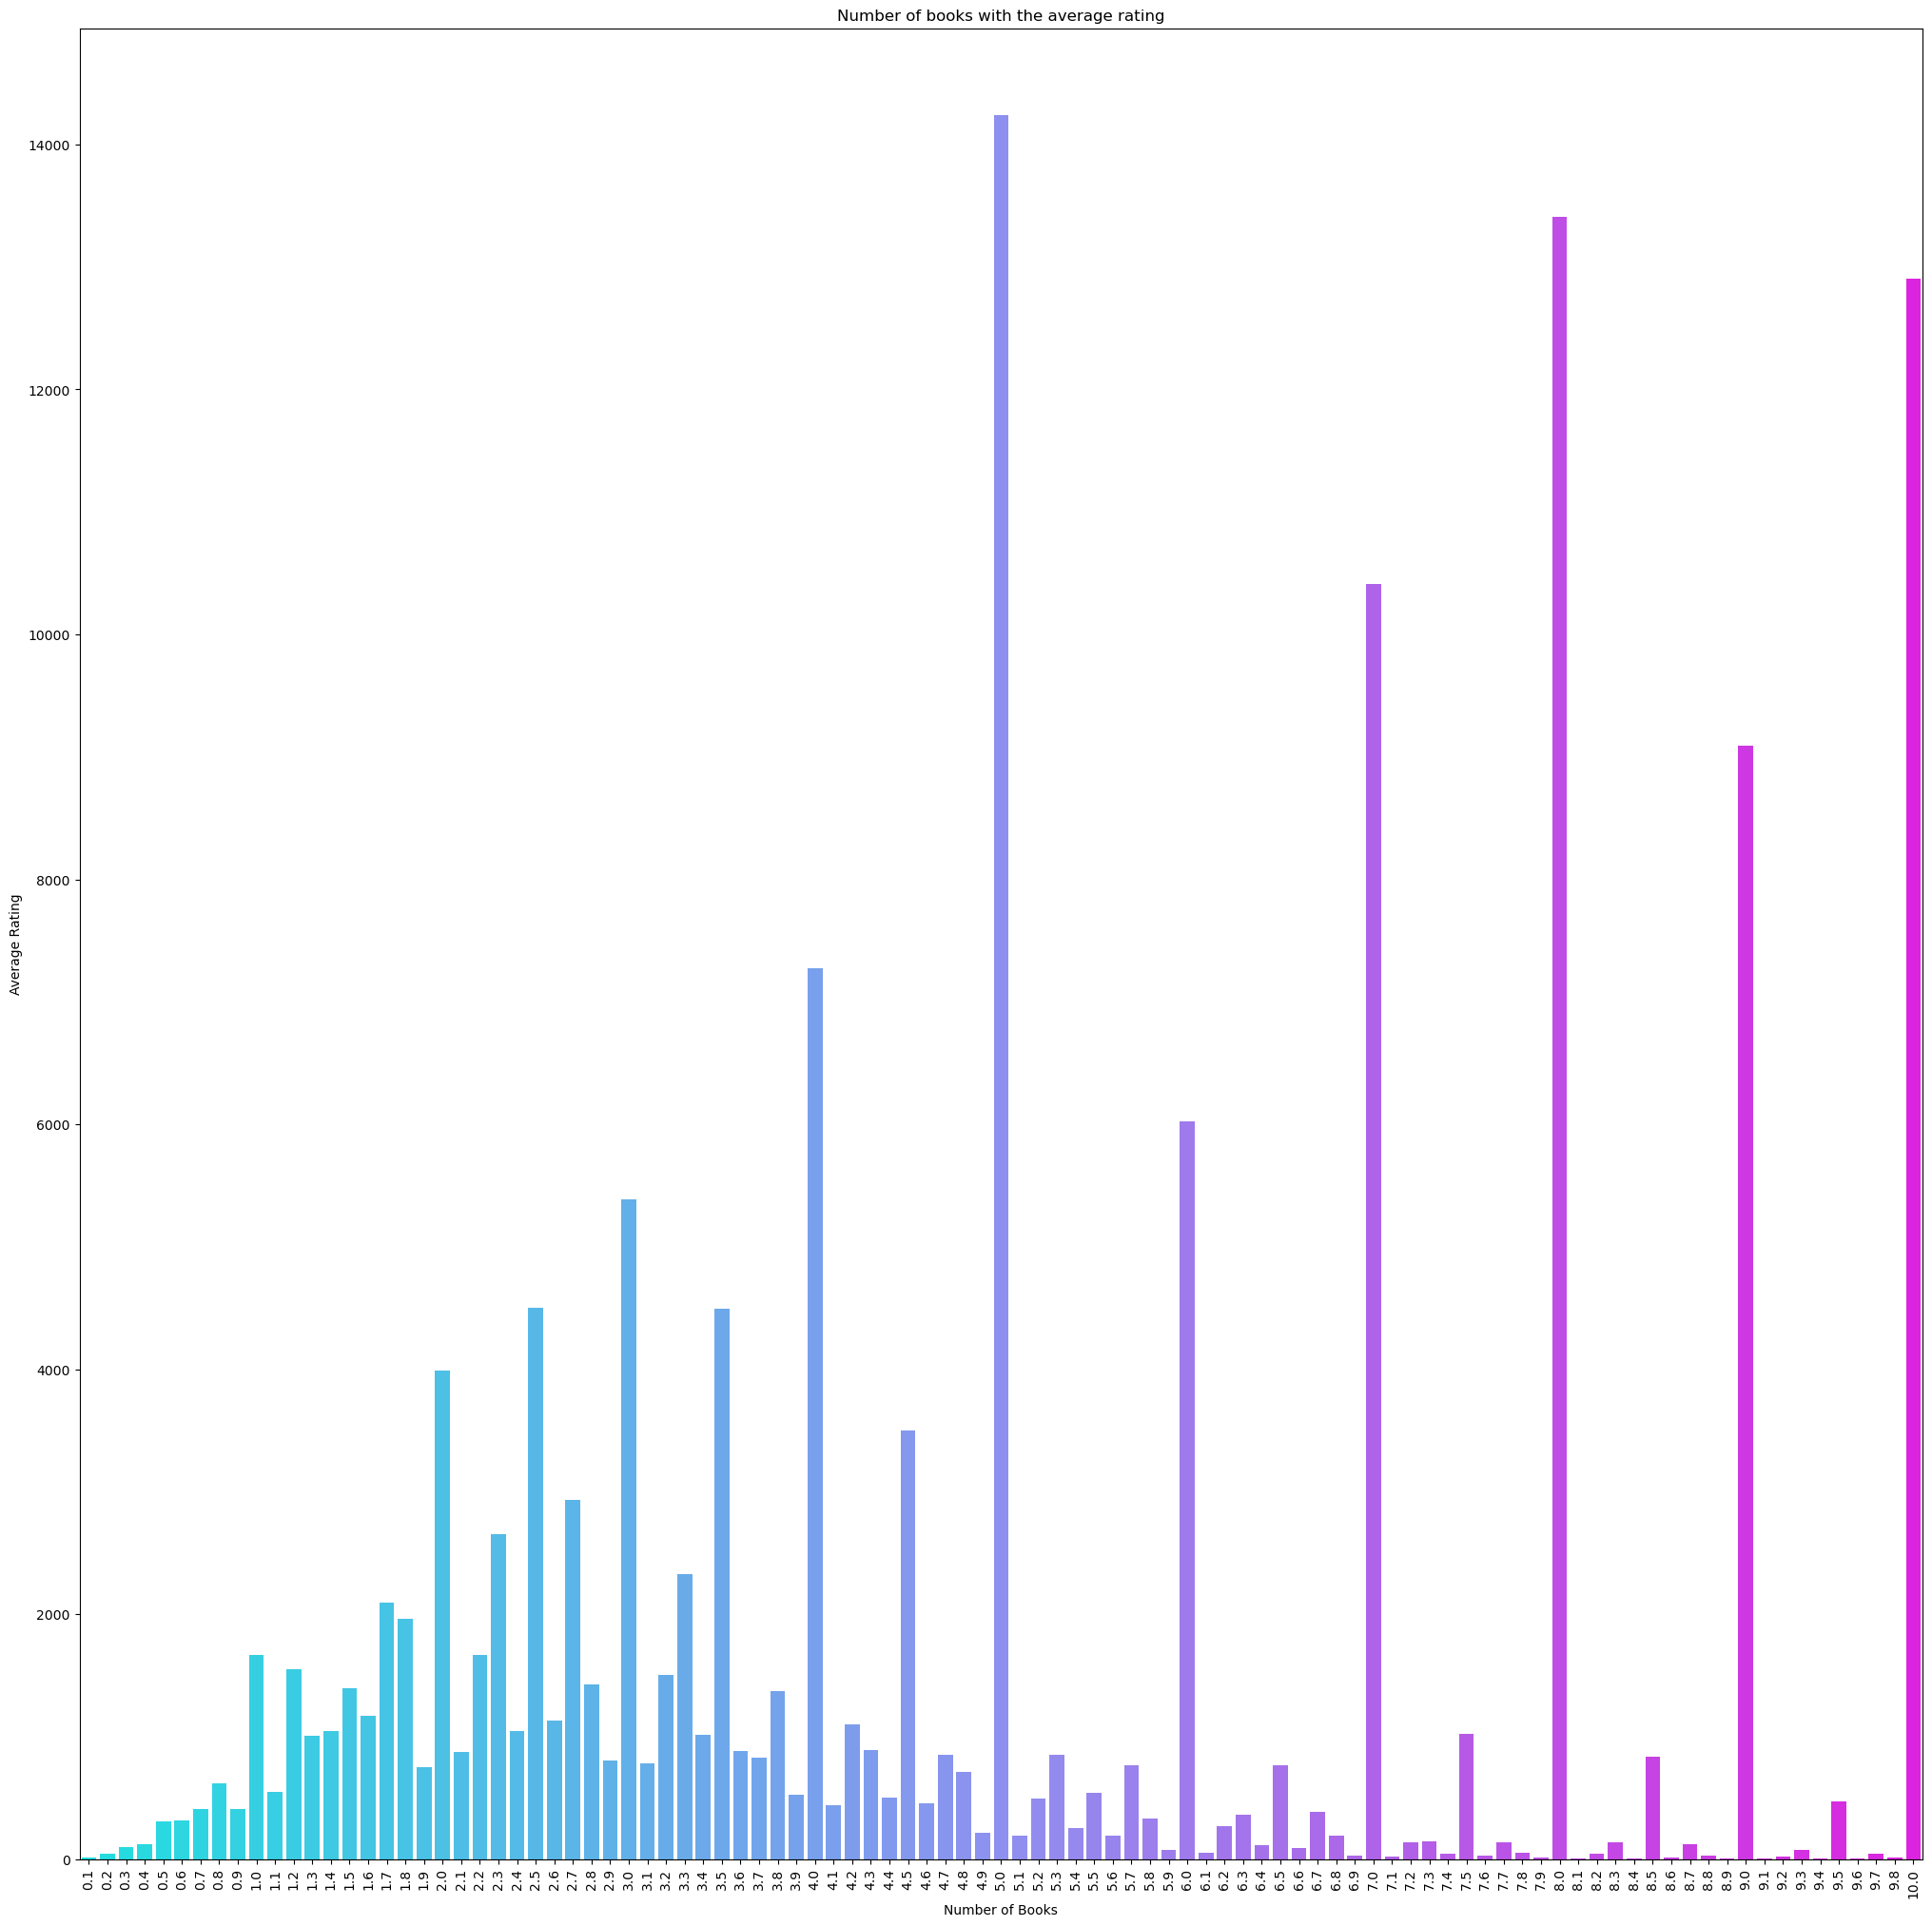

In [71]:
cool = sns.color_palette("cool", n_colors=len(ratings_sorted.values))
plt.figure(figsize=(25,25))
ratings_sorted_0_excluded = ratings_sorted.drop(index=0.0).sort_index(ascending=False)
sns_plot = sns.barplot(x=ratings_sorted_0_excluded.index, y=ratings_sorted_0_excluded.values ,palette=cool)
plt.xticks(rotation=90)
plt.xlabel("Number of Books")
plt.ylabel('Average Rating')
plt.title("Number of books with the average rating")
plt.show()

In [72]:
top_20_ratings = books_with_rating['Average-Rating'].value_counts().drop(index=0.0).sort_values(ascending=False).head(20)

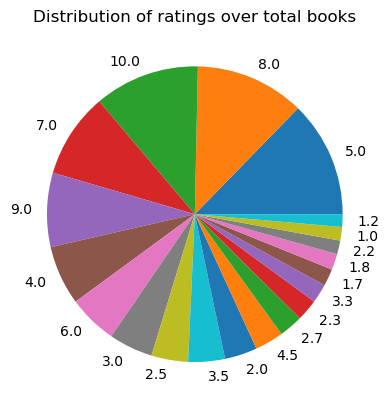

In [74]:
plt.pie(top_20_ratings, labels=top_20_ratings.index)
plt.title("Distribution of ratings over total books")
plt.show()

In [75]:
users.head()

,User-ID,Location,Age
1,2,"stockton, california, usa",18.0
3,4,"porto, v.n.gaia, portugal",17.0
5,6,"santa monica, california, usa",61.0
9,10,"albacete, wisconsin, spain",26.0
10,11,"melbourne, victoria, australia",14.0


In [76]:
users["Age"].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [78]:
users[users["Age"] == 0]

,User-ID,Location,Age
219,220,"bogota, bogota, colombia",0.0
469,470,"indianapolis, indiana, usa",0.0
561,562,"adfdaf, australian capital territory, albania",0.0
1460,1461,"kolding, none, denmark",0.0
1909,1910,"vigo, galicia, spain",0.0
...,...,...,...
275884,275885,"aveiro, beira litoral, portugal",0.0
276184,276185,"gijon, asturias, spain",0.0
276226,276227,"belfast, nevada, united kingdom",0.0
276315,276316,"seattle, washington, usa",0.0


In [79]:
users = users[users["Age"] != 0]

In [80]:
users = users[(users["Age"] >= 15) & (users["Age"] <= 100)]

In [81]:
users.describe()

,User-ID,Age
count,163417.000000,163417.000000
mean,139461.607311,35.201613
std,80529.967011,13.402958
min,2.000000,15.000000
25%,70018.000000,25.000000
50%,139467.000000,33.000000
75%,209169.000000,44.000000
max,278855.000000,100.000000


In [83]:
users.isnull().sum()

User-ID     0
Location    0
Age         0
dtype: int64

In [84]:
users["Location"].value_counts().head(10)

Location
london, england, united kingdom       1592
madrid, madrid, spain                 1312
toronto, ontario, canada              1205
sydney, new south wales, australia    1204
melbourne, victoria, australia        1001
chicago, illinois, usa                 879
barcelona, barcelona, spain            865
berlin, berlin, germany                782
barcelona, catalunya, spain            765
seattle, washington, usa               730
Name: count, dtype: int64

## Building Recommendation System

We'll implement multiple recommendation approaches:
1. **Popularity-Based Recommendations**: Recommend most popular/highest rated books
2. **Collaborative Filtering (Item-Based)**: Find similar books based on user ratings
3. **Content-Based Filtering**: Recommend books similar to a given book based on features (author, publisher, etc.)


### 1. Popularity-Based Recommendations


In [88]:
def popularity_based_recommendations(n=10, min_ratings=50):
    """
    Get the most popular books based on average rating and number of ratings.
    
    Parameters:
    - n: Number of recommendations to return
    - min_ratings: Minimum number of ratings required for a book to be considered
    
    Returns:
    - DataFrame with top N popular books
    """
    # Calculate number of ratings per book
    rating_counts = BookRating.groupby('ISBN')['Book-Rating'].count().reset_index()
    rating_counts.rename(columns={'Book-Rating': 'Rating-Count'}, inplace=True)
    
    # Merge with books_with_rating
    popular_books = pd.merge(books_with_rating, rating_counts, on='ISBN')
    
    # Filter books with minimum ratings
    popular_books = popular_books[popular_books['Rating-Count'] >= min_ratings]
    
    # Sort by average rating (descending) and rating count (descending)
    popular_books = popular_books.sort_values(
        by=['Average-Rating', 'Rating-Count'], 
        ascending=[False, False]
    )
    
    return popular_books[['ISBN', 'Book-Title', 'Book-Author', 'Average-Rating', 'Rating-Count', 'Publisher']].head(n)

# Get top 20 popular books
popular_recommendations = popularity_based_recommendations(n=20, min_ratings=50)
print("Top 20 Popular Books:")
popular_recommendations


Top 20 Popular Books:


,ISBN,Book-Title,Book-Author,Average-Rating,Rating-Count,Publisher
2974,1844262553,Free,Paul Vincent,8.0,54,Upfront Publishing
5329,0439064864,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,6.6,170,Scholastic
3767,0439136350,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,6.5,197,Scholastic
5328,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,6.5,194,Scholastic
2757,0590353403,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,6.4,168,Scholastic
12517,0618002227,The Fellowship of the Ring (The Lord of the Ri...,J. R. R. Tolkien,6.2,63,Houghton Mifflin Company
3297,0385199570,The Stand (The Complete and Uncut Edition),Stephen King,6.2,57,Doubleday Books
19298,0877017883,Griffin &amp; Sabine: An Extraordinary Corresp...,Nick Bantock,6.0,72,Chronicle Books
384,0156528207,The Little Prince,Antoine de Saint-ExupÃ©ry,5.8,79,Harcourt
3706,039480001X,The Cat in the Hat,Dr. Seuss,5.7,52,Random House Books for Young Readers


### 2. Collaborative Filtering (Item-Based)


In [96]:
# Prepare data for collaborative filtering
# Create a pivot table: users as rows, books (ISBN) as columns, ratings as values
print("Creating user-item matrix for collaborative filtering...")
print(f"Total users: {BookRating['User-ID'].nunique()}")
print(f"Total books: {BookRating['ISBN'].nunique()}")

# Filter to books and users with sufficient interactions to reduce sparsity
min_book_ratings = 50  # Minimum number of ratings per book
min_user_ratings = 5   # Minimum number of ratings per user

book_counts = BookRating['ISBN'].value_counts()
valid_books = book_counts[book_counts >= min_book_ratings].index

user_counts = BookRating['User-ID'].value_counts()
valid_users = user_counts[user_counts >= min_user_ratings].index

# Filter the data
filtered_ratings = BookRating[
    (BookRating['ISBN'].isin(valid_books)) & 
    (BookRating['User-ID'].isin(valid_users))
]

print(f"After filtering - Users: {filtered_ratings['User-ID'].nunique()}, Books: {filtered_ratings['ISBN'].nunique()}")
print(f"Filtered ratings shape: {filtered_ratings.shape}")


Creating user-item matrix for collaborative filtering...
Total users: 90679
Total books: 265531
After filtering - Users: 16789, Books: 2147
Filtered ratings shape: (202381, 10)


In [99]:
# Create user-item matrix
user_item_matrix = filtered_ratings.pivot_table(
    index='ISBN', 
    columns='User-ID', 
    values='Book-Rating',
    fill_value=0
)

print(f"User-item matrix shape: {user_item_matrix.shape}")
print(f"Sparsity: {(1 - (user_item_matrix != 0).sum().sum() / (user_item_matrix.shape[0] * user_item_matrix.shape[1])) * 100:.2f}%")


User-item matrix shape: (2147, 16789)
Sparsity: 99.79%


In [101]:
# Calculate item-item similarity using cosine similarity
print("Calculating item-item similarity matrix...")
item_similarity = cosine_similarity(user_item_matrix)
item_similarity_df = pd.DataFrame(
    item_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

print("Item similarity matrix created!")
print(f"Similarity matrix shape: {item_similarity_df.shape}")


Calculating item-item similarity matrix...
Item similarity matrix created!
Similarity matrix shape: (2147, 2147)


In [102]:
def collaborative_filtering_recommendations(isbn, n=10):
    """
    Get book recommendations using collaborative filtering (item-based).
    
    Parameters:
    - isbn: ISBN of the book to find similar books for
    - n: Number of recommendations to return
    
    Returns:
    - DataFrame with recommended books
    """
    if isbn not in item_similarity_df.index:
        return pd.DataFrame()  # Return empty DataFrame if ISBN not found
    
    # Get similarity scores for the given book
    similar_books = item_similarity_df[isbn].sort_values(ascending=False)
    
    # Remove the book itself (similarity = 1.0)
    similar_books = similar_books[similar_books.index != isbn]
    
    # Get top N similar books
    top_similar_isbns = similar_books.head(n).index.tolist()
    
    # Get book details
    recommendations = books_with_rating[books_with_rating['ISBN'].isin(top_similar_isbns)].copy()
    
    # Add similarity scores
    similarity_scores = similar_books[top_similar_isbns].values
    recommendations['Similarity-Score'] = similarity_scores
    
    # Sort by similarity score
    recommendations = recommendations.sort_values('Similarity-Score', ascending=False)
    
    return recommendations[['ISBN', 'Book-Title', 'Book-Author', 'Average-Rating', 'Similarity-Score', 'Publisher']]

# Test with a sample book
sample_isbn = filtered_ratings['ISBN'].iloc[0]
print(f"Sample ISBN: {sample_isbn}")
sample_book = books_with_rating[books_with_rating['ISBN'] == sample_isbn]
if not sample_book.empty:
    print(f"\nSample Book: {sample_book['Book-Title'].values[0]}")
    print("\nCollaborative Filtering Recommendations:")
    collab_recs = collaborative_filtering_recommendations(sample_isbn, n=10)
    collab_recs


Sample ISBN: 0425115801

Sample Book: Lightning

Collaborative Filtering Recommendations:


### 3. Content-Based Filtering


In [104]:
# Prepare content features for content-based filtering
# Combine book features into a single text feature
books_with_rating['Content'] = (
    books_with_rating['Book-Author'].fillna('') + ' ' +
    books_with_rating['Publisher'].fillna('') + ' ' +
    books_with_rating['Book-Title'].fillna('')
)

# Create TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
tfidf_matrix = tfidf.fit_transform(books_with_rating['Content'])

print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")
print("Content-based feature matrix created!")


TF-IDF matrix shape: (265531, 5000)
Content-based feature matrix created!


In [107]:
def content_based_recommendations(isbn, n=10):
    """
    Get book recommendations using content-based filtering.
    
    Parameters:
    - isbn: ISBN of the book to find similar books for
    - n: Number of recommendations to return
    
    Returns:
    - DataFrame with recommended books
    """
    if isbn not in content_similarity_df.index:
        return pd.DataFrame()  # Return empty DataFrame if ISBN not found
    
    # Get similarity scores for the given book
    similar_books = content_similarity_df[isbn].sort_values(ascending=False)
    
    # Remove the book itself (similarity = 1.0)
    similar_books = similar_books[similar_books.index != isbn]
    
    # Get top N similar books
    top_similar_isbns = similar_books.head(n).index.tolist()
    
    # Get book details
    recommendations = books_with_rating[books_with_rating['ISBN'].isin(top_similar_isbns)].copy()
    
    # Add similarity scores
    similarity_scores = similar_books[top_similar_isbns].values
    recommendations['Similarity-Score'] = similarity_scores
    
    # Sort by similarity score
    recommendations = recommendations.sort_values('Similarity-Score', ascending=False)
    
    return recommendations[['ISBN', 'Book-Title', 'Book-Author', 'Average-Rating', 'Similarity-Score', 'Publisher']]

# Test with a sample book
sample_isbn = books_with_rating['ISBN'].iloc[0]
print(f"Sample ISBN: {sample_isbn}")
sample_book = books_with_rating[books_with_rating['ISBN'] == sample_isbn]
if not sample_book.empty:
    print(f"\nSample Book: {sample_book['Book-Title'].values[0]}")
    print(f"Author: {sample_book['Book-Author'].values[0]}")
    print("\nContent-Based Recommendations:")
    content_recs = content_based_recommendations(sample_isbn, n=10)
    content_recs


Sample ISBN: 0195153448

Sample Book: Classical Mythology
Author: Mark P. O. Morford

Content-Based Recommendations:


NameError: name 'content_similarity_df' is not defined

### 4. Hybrid Recommendation System


In [ ]:
def hybrid_recommendations(isbn, n=10, collab_weight=0.5, content_weight=0.5):
    """
    Get book recommendations using a hybrid approach combining collaborative and content-based filtering.
    
    Parameters:
    - isbn: ISBN of the book to find similar books for
    - n: Number of recommendations to return
    - collab_weight: Weight for collaborative filtering scores (default: 0.5)
    - content_weight: Weight for content-based scores (default: 0.5)
    
    Returns:
    - DataFrame with recommended books
    """
    # Get collaborative filtering recommendations
    collab_recs = collaborative_filtering_recommendations(isbn, n=n*2)
    
    # Get content-based recommendations
    content_recs = content_based_recommendations(isbn, n=n*2)
    
    # If either is empty, return the non-empty one
    if collab_recs.empty:
        return content_recs.head(n)
    if content_recs.empty:
        return collab_recs.head(n)
    
    # Merge recommendations
    all_isbns = set(collab_recs['ISBN'].tolist()) | set(content_recs['ISBN'].tolist())
    
    hybrid_scores = {}
    for rec_isbn in all_isbns:
        collab_score = 0
        content_score = 0
        
        if rec_isbn in collab_recs['ISBN'].values:
            collab_score = collab_recs[collab_recs['ISBN'] == rec_isbn]['Similarity-Score'].values[0]
        
        if rec_isbn in content_recs['ISBN'].values:
            content_score = content_recs[content_recs['ISBN'] == rec_isbn]['Similarity-Score'].values[0]
        
        # Weighted combination
        hybrid_score = (collab_weight * collab_score) + (content_weight * content_score)
        hybrid_scores[rec_isbn] = hybrid_score
    
    # Sort by hybrid score
    sorted_isbns = sorted(hybrid_scores.items(), key=lambda x: x[1], reverse=True)
    top_isbns = [isbn for isbn, score in sorted_isbns[:n]]
    
    # Get book details
    recommendations = books_with_rating[books_with_rating['ISBN'].isin(top_isbns)].copy()
    recommendations['Hybrid-Score'] = [hybrid_scores[isbn] for isbn in recommendations['ISBN']]
    recommendations = recommendations.sort_values('Hybrid-Score', ascending=False)
    
    return recommendations[['ISBN', 'Book-Title', 'Book-Author', 'Average-Rating', 'Hybrid-Score', 'Publisher']]

# Test hybrid recommendations
sample_isbn = books_with_rating['ISBN'].iloc[0]
print(f"Sample ISBN: {sample_isbn}")
sample_book = books_with_rating[books_with_rating['ISBN'] == sample_isbn]
if not sample_book.empty:
    print(f"\nSample Book: {sample_book['Book-Title'].values[0]}")
    print("\nHybrid Recommendations:")
    hybrid_recs = hybrid_recommendations(sample_isbn, n=10)
    hybrid_recs


### 5. User-Based Recommendations


In [ ]:
def get_user_recommendations(user_id, n=10, method='hybrid'):
    """
    Get book recommendations for a specific user.
    
    Parameters:
    - user_id: User ID to get recommendations for
    - n: Number of recommendations to return
    - method: 'popularity', 'collaborative', 'content', or 'hybrid'
    
    Returns:
    - DataFrame with recommended books
    """
    # Get books the user has already rated
    user_rated_books = filtered_ratings[filtered_ratings['User-ID'] == user_id]['ISBN'].tolist()
    
    if not user_rated_books:
        # If user has no ratings, return popular books
        return popularity_based_recommendations(n=n)
    
    # Get recommendations based on user's highest rated books
    user_ratings = filtered_ratings[filtered_ratings['User-ID'] == user_id]
    user_ratings = user_ratings.sort_values('Book-Rating', ascending=False)
    
    # Get top 3 books the user rated highly
    top_user_books = user_ratings.head(3)['ISBN'].tolist()
    
    if method == 'popularity':
        return popularity_based_recommendations(n=n)
    
    elif method == 'collaborative':
        # Get recommendations for each top book and combine
        all_recommendations = []
        for isbn in top_user_books:
            recs = collaborative_filtering_recommendations(isbn, n=n)
            all_recommendations.append(recs)
        
        if all_recommendations:
            combined = pd.concat(all_recommendations, ignore_index=True)
            # Remove books user already rated
            combined = combined[~combined['ISBN'].isin(user_rated_books)]
            # Remove duplicates and sort by similarity
            combined = combined.drop_duplicates(subset='ISBN')
            return combined.head(n)
        return pd.DataFrame()
    
    elif method == 'content':
        # Get recommendations for each top book and combine
        all_recommendations = []
        for isbn in top_user_books:
            recs = content_based_recommendations(isbn, n=n)
            all_recommendations.append(recs)
        
        if all_recommendations:
            combined = pd.concat(all_recommendations, ignore_index=True)
            # Remove books user already rated
            combined = combined[~combined['ISBN'].isin(user_rated_books)]
            # Remove duplicates and sort by similarity
            combined = combined.drop_duplicates(subset='ISBN')
            return combined.head(n)
        return pd.DataFrame()
    
    else:  # hybrid
        # Get recommendations for each top book and combine
        all_recommendations = []
        for isbn in top_user_books:
            recs = hybrid_recommendations(isbn, n=n)
            all_recommendations.append(recs)
        
        if all_recommendations:
            combined = pd.concat(all_recommendations, ignore_index=True)
            # Remove books user already rated
            combined = combined[~combined['ISBN'].isin(user_rated_books)]
            # Remove duplicates and sort by hybrid score
            combined = combined.drop_duplicates(subset='ISBN')
            return combined.head(n)
        return pd.DataFrame()

# Test with a sample user
sample_user_id = filtered_ratings['User-ID'].iloc[0]
print(f"Sample User ID: {sample_user_id}")
print("\nUser's Rated Books:")
user_books = filtered_ratings[filtered_ratings['User-ID'] == sample_user_id].merge(
    books_with_rating[['ISBN', 'Book-Title', 'Book-Author']], on='ISBN'
)[['Book-Title', 'Book-Author', 'Book-Rating']].head(10)
print(user_books)

print("\n\nHybrid Recommendations for User:")
user_recs = get_user_recommendations(sample_user_id, n=10, method='hybrid')
user_recs


### 6. Recommendation by Book Title


In [ ]:
def recommend_by_title(book_title, n=10, method='hybrid'):
    """
    Get book recommendations based on a book title.
    
    Parameters:
    - book_title: Title of the book (can be partial)
    - n: Number of recommendations to return
    - method: 'popularity', 'collaborative', 'content', or 'hybrid'
    
    Returns:
    - DataFrame with recommended books
    """
    # Find books matching the title (case-insensitive, partial match)
    matching_books = books_with_rating[
        books_with_rating['Book-Title'].str.contains(book_title, case=False, na=False)
    ]
    
    if matching_books.empty:
        print(f"No books found matching '{book_title}'")
        return pd.DataFrame()
    
    print(f"Found {len(matching_books)} book(s) matching '{book_title}':")
    for idx, row in matching_books.head(5).iterrows():
        print(f"  - {row['Book-Title']} by {row['Book-Author']} (ISBN: {row['ISBN']})")
    
    # Use the first matching book
    isbn = matching_books.iloc[0]['ISBN']
    book_title_full = matching_books.iloc[0]['Book-Title']
    
    print(f"\nGetting recommendations similar to: {book_title_full}")
    
    if method == 'popularity':
        return popularity_based_recommendations(n=n)
    elif method == 'collaborative':
        return collaborative_filtering_recommendations(isbn, n=n)
    elif method == 'content':
        return content_based_recommendations(isbn, n=n)
    else:  # hybrid
        return hybrid_recommendations(isbn, n=n)

# Test with a sample book title
sample_title = books_with_rating['Book-Title'].iloc[0]
print(f"Testing with book title: '{sample_title[:50]}...'")
print("\n" + "="*80)
recommendations = recommend_by_title(sample_title[:30], n=10, method='hybrid')
recommendations


## Summary

The recommendation system includes:

1. **Popularity-Based**: Recommends books with high average ratings and many ratings
2. **Collaborative Filtering**: Finds books similar to a given book based on user rating patterns
3. **Content-Based**: Recommends books with similar features (author, publisher, title)
4. **Hybrid**: Combines collaborative and content-based approaches for better recommendations
5. **User-Based**: Provides personalized recommendations based on a user's rating history
6. **Title-Based**: Allows searching by book title and getting recommendations

### Usage Examples:

```python
# Get popular books
popular_recommendations = popularity_based_recommendations(n=20)

# Get recommendations for a specific book (by ISBN)
collab_recs = collaborative_filtering_recommendations('034545104X', n=10)
content_recs = content_based_recommendations('034545104X', n=10)
hybrid_recs = hybrid_recommendations('034545104X', n=10)

# Get recommendations for a user
user_recs = get_user_recommendations(user_id=12345, n=10, method='hybrid')

# Get recommendations by book title
title_recs = recommend_by_title('Harry Potter', n=10, method='hybrid')
```


In [ ]:
# Calculate cosine similarity for content-based recommendations
content_similarity = cosine_similarity(tfidf_matrix)
content_similarity_df = pd.DataFrame(
    content_similarity,
    index=books_with_rating['ISBN'],
    columns=books_with_rating['ISBN']
)

print("Content similarity matrix created!")
print(f"Similarity matrix shape: {content_similarity_df.shape}")
